In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import datetime as dt
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
p = Path("C:/Users/k/Desktop/GitHub/GPS_transport/")

aug_data = pd.read_hdf(p / "processed_data" / "aug_all.h5", key="aug")
segments = pd.read_csv(p / "input_data" / "python" / "segments.csv")
markers = pd.read_csv(p / "input_data" / "python" / "markers.csv")

In [3]:
aug_data = aug_data.loc[:,["segment_id" , "aug_time", "speed"]]
aug_data = aug_data.dropna(subset=["speed"])
aug_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25435205 entries, 0 to 533346
Data columns (total 3 columns):
 #   Column      Non-Null Count     Dtype         
---  ------      --------------     -----         
 0   segment_id  25435205 non-null  uint16        
 1   aug_time    25435205 non-null  datetime64[ns]
 2   speed       25435205 non-null  float64       
dtypes: datetime64[ns](1), float64(1), uint16(1)
memory usage: 630.7 MB


In [4]:
selected_segment_id = np.arange(12,20)
print(f"selected segments are:{selected_segment_id}")
aug_data = aug_data.loc[aug_data["segment_id"].isin(selected_segment_id), ["aug_time","speed","segment_id"]]
aug_data = aug_data.sort_values(["segment_id", "aug_time"]).reset_index(drop=True)

selected segments are:[12 13 14 15 16 17 18 19]


In [5]:
aug_data.loc[aug_data["segment_id"] == 12].set_index("aug_time").loc["2019-12-03 19:00:00" : "2019-12-03 23:00:00"]

,speed,segment_id
aug_time,,
2019-12-03 19:39:55.780780792,69.18053,12


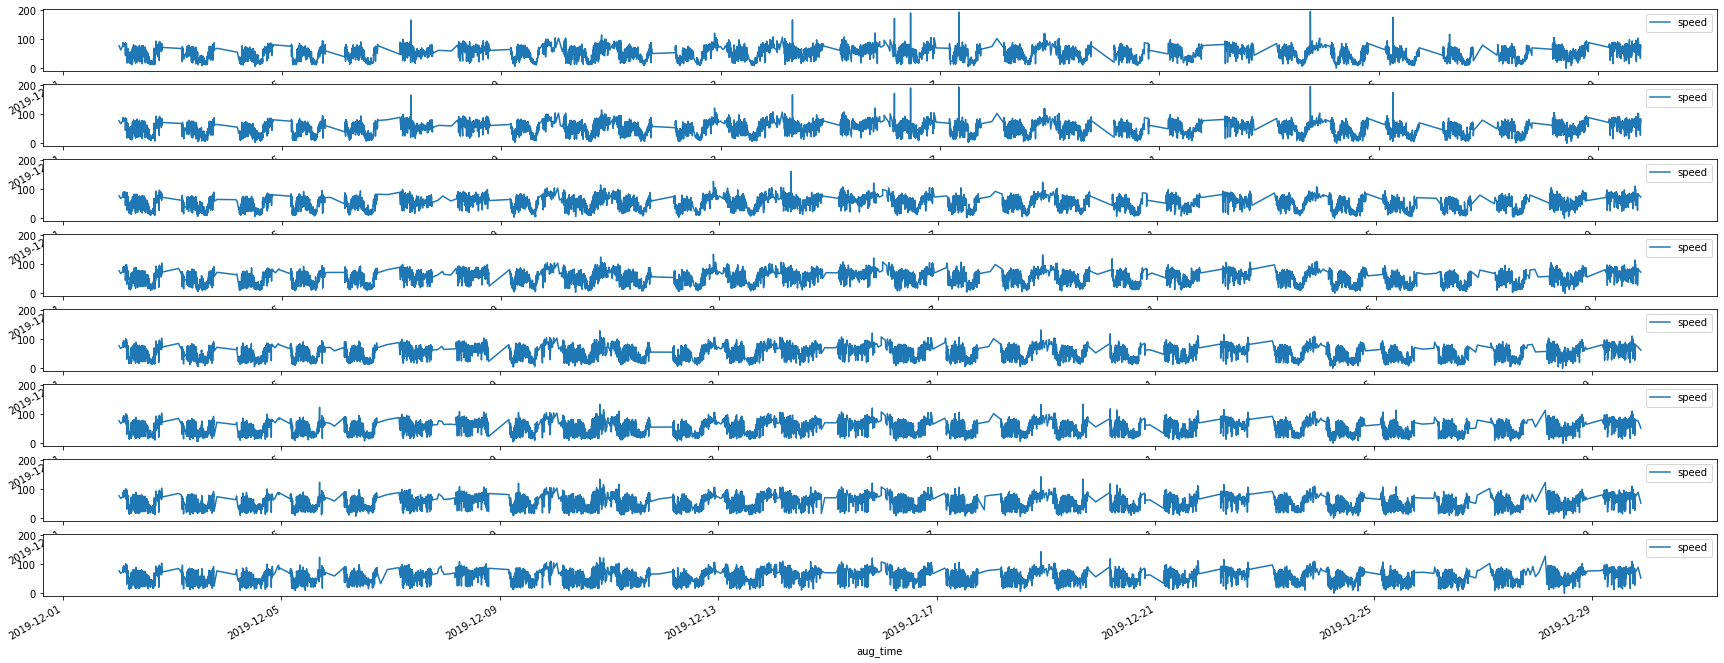

In [6]:
nrows = len(selected_segment_id)

fig, axes = plt.subplots(nrows=nrows, figsize=(30,12), sharey=True)
for i, ax in enumerate(axes):
    aug_data[aug_data["segment_id"] == selected_segment_id[i]].set_index("aug_time").plot(ax=ax, y="speed");

In [7]:
for s_id in selected_segment_id:
    stationary_check = sm.tsa.stattools.adfuller(aug_data.loc[aug_data["segment_id"] == s_id,"speed"])
    print(f"p value is {stationary_check[1]}, segment_id = {s_id} ")

p value is 1.0140072211043273e-18, segment_id = 12 
p value is 5.009210968795794e-18, segment_id = 13 
p value is 5.541205351496852e-17, segment_id = 14 
p value is 3.734937681597918e-16, segment_id = 15 
p value is 6.0737634240691e-17, segment_id = 16 
p value is 7.792686464699818e-17, segment_id = 17 
p value is 1.932981465435094e-18, segment_id = 18 
p value is 3.097824647029122e-19, segment_id = 19 


In [8]:
time_bin = "30T"
aug_data = aug_data.groupby("segment_id").apply(lambda x: x.set_index("aug_time").resample(time_bin)["speed"].mean())
aug_data = aug_data.unstack(0)

In [9]:
aug_data

segment_id,12,13,14,15,16,17,18,19
aug_time,,,,,,,,
2019-12-02 00:30:00,78.114306,78.114318,78.114311,78.114307,78.114312,78.114307,78.114310,78.114310
2019-12-02 01:00:00,63.649178,68.003190,68.545695,68.545690,68.545697,68.545695,68.545696,68.545694
2019-12-02 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-02 02:00:00,83.842047,83.362057,82.285159,82.285159,82.285161,82.285156,82.285158,82.285159
2019-12-02 02:30:00,76.875536,76.875541,81.502127,82.088173,84.939526,84.939522,84.939525,84.939523
...,...,...,...,...,...,...,...,...
2019-12-29 19:00:00,NaN,NaN,NaN,79.908194,79.908201,79.908195,79.510204,76.840649
2019-12-29 19:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-29 20:00:00,NaN,NaN,73.193863,73.193861,73.193870,78.008915,90.256195,90.256193


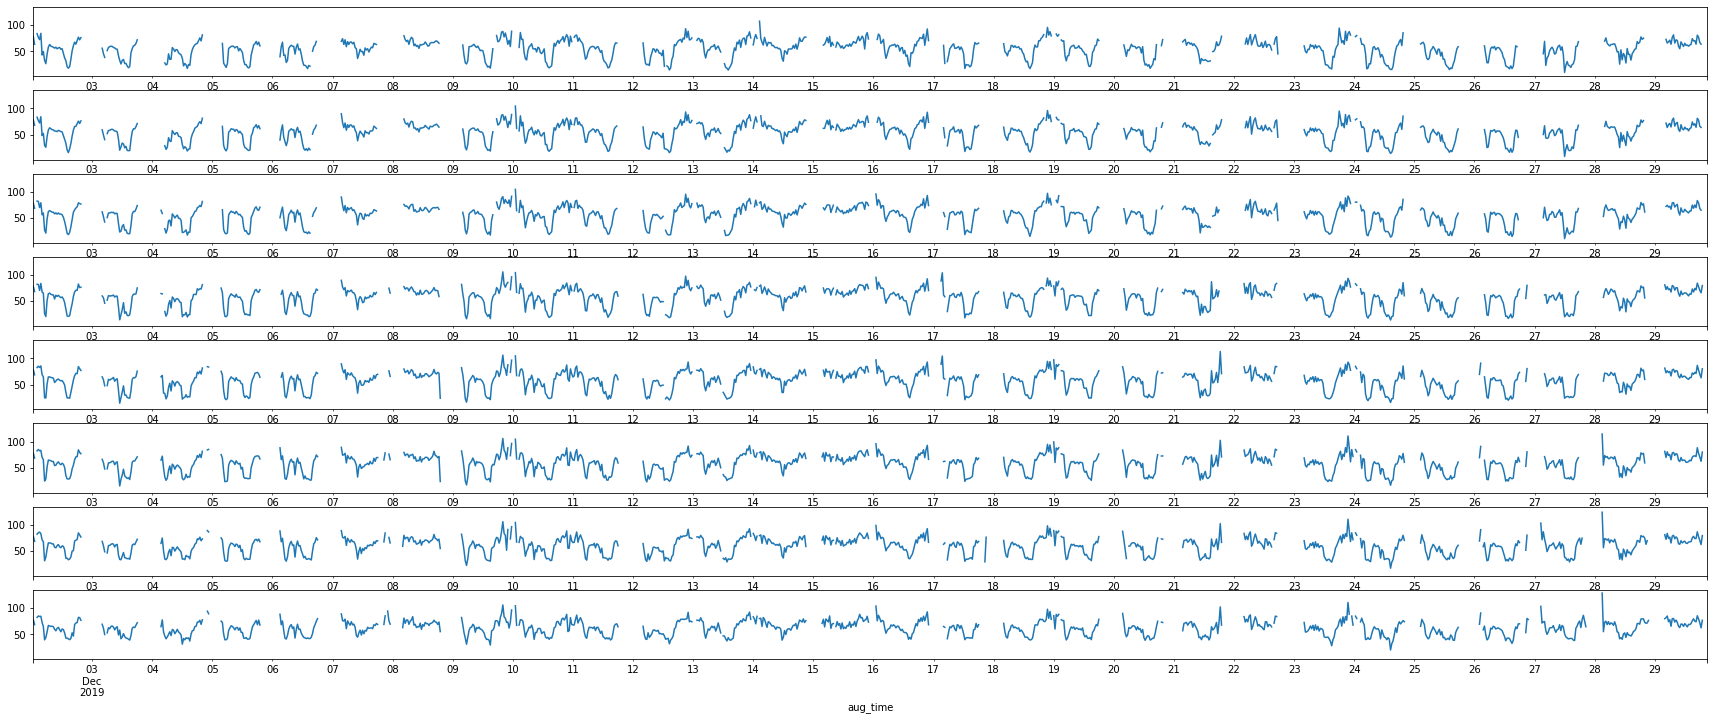

In [10]:
fig, axes = plt.subplots(nrows=nrows, figsize=(30,12), sharey=True)
for i, ax in enumerate(axes):
    aug_data[selected_segment_id[i]].plot(ax=ax, y="speed");

In [11]:
aug_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1338 entries, 2019-12-02 00:30:00 to 2019-12-29 21:00:00
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   12      956 non-null    float64
 1   13      959 non-null    float64
 2   14      965 non-null    float64
 3   15      989 non-null    float64
 4   16      1004 non-null   float64
 5   17      1008 non-null   float64
 6   18      1017 non-null   float64
 7   19      1025 non-null   float64
dtypes: float64(8)
memory usage: 94.1 KB


### Segment located in front of ODTU is selected (dir = 2, polatli > ankara)

### Stationary check
#### (p value < significance level) --> reject stationay --> the series is non-stationary

### Agregation on time bins & NaNs

In [12]:
time_1 = dt.time.fromisoformat("20:00:00")
time_2 = dt.time.fromisoformat("06:00:00")
aug_data = aug_data.loc[~((aug_data.index.time > time_1) | (aug_data.index.time < time_2))]
aug_data = aug_data.loc[~((aug_data.index.weekday == 6) | (aug_data.index.weekday == 5))]

In [13]:
aug_data["int_based"] = np.arange(0,len(aug_data))
print(aug_data.info())
print(aug_data.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 580 entries, 2019-12-02 06:00:00 to 2019-12-27 20:00:00
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   12         530 non-null    float64
 1   13         532 non-null    float64
 2   14         531 non-null    float64
 3   15         539 non-null    float64
 4   16         540 non-null    float64
 5   17         541 non-null    float64
 6   18         543 non-null    float64
 7   19         546 non-null    float64
 8   int_based  580 non-null    int32  
dtypes: float64(8), int32(1)
memory usage: 43.0 KB
None
segment_id                  12         13         14         15         16  \
aug_time                                                                     
2019-12-02 06:00:00  44.722729  46.666964  48.237859  51.416755  51.330338   
2019-12-02 06:30:00  58.105187  58.985505  62.058362  64.227061  64.514188   
2019-12-02 07:00:00  63.253963  63.140614  64.05367

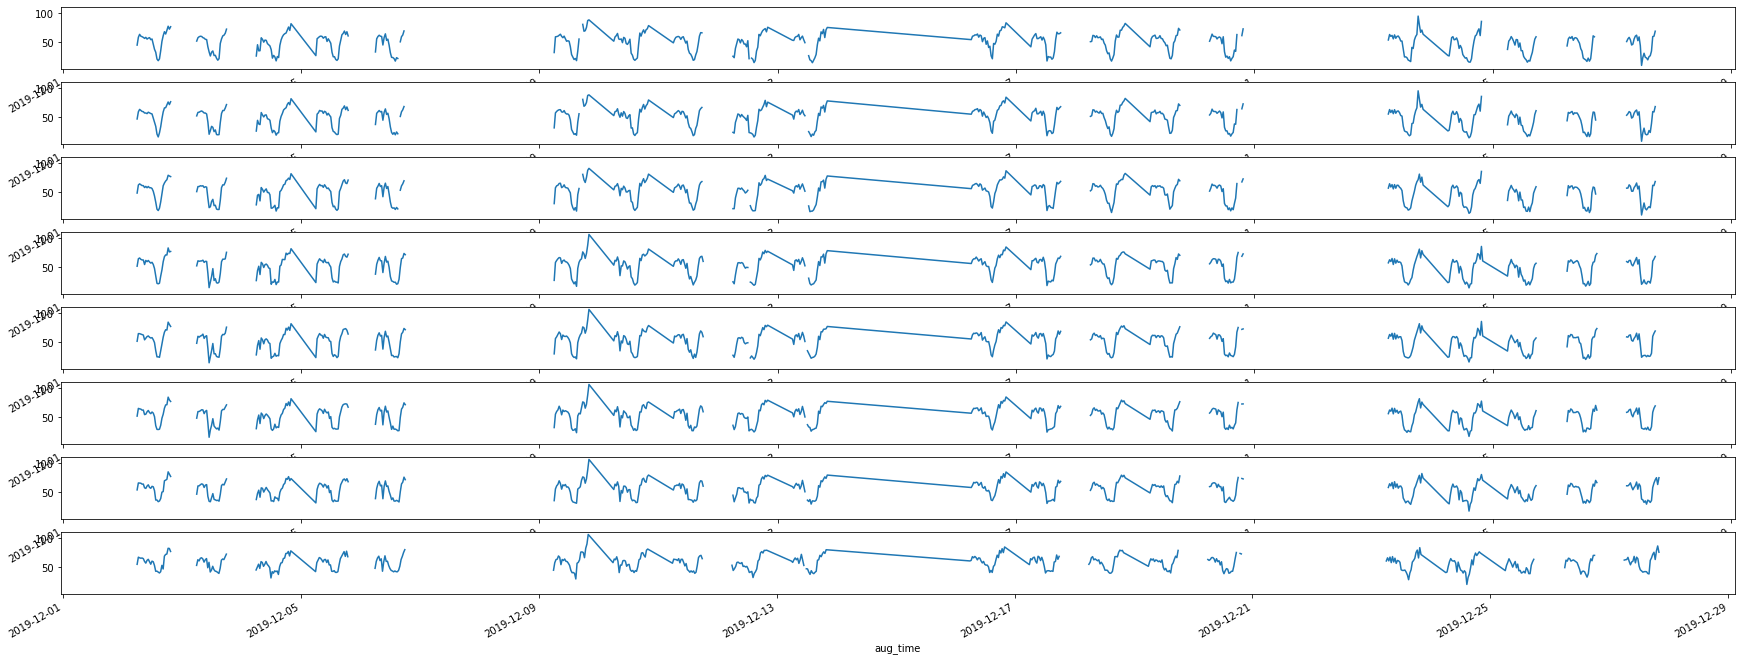

In [14]:
fig, axes = plt.subplots(nrows=nrows, figsize=(30,12), sharey=True)
for i, ax in enumerate(axes):
    aug_data[selected_segment_id[i]].plot(ax=ax, y="speed");

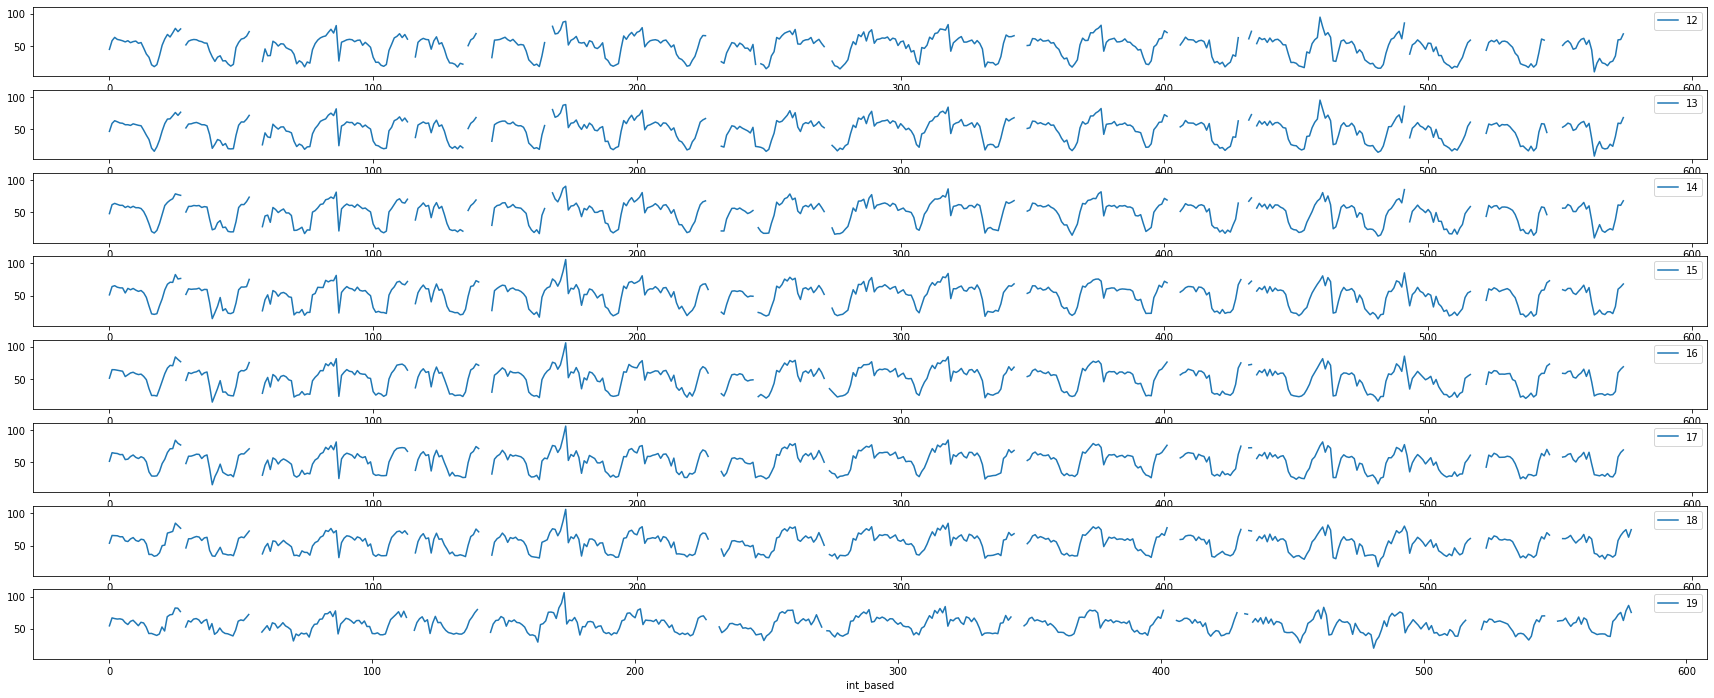

In [15]:
fig, axes = plt.subplots(nrows=nrows, figsize=(30,12), sharey=True)
for i, ax in enumerate(axes):
    aug_data[[selected_segment_id[i],"int_based"]].plot(x="int_based", y=selected_segment_id[i], ax=ax);

In [16]:
aug_data.loc[aug_data.isna().sum(axis=1) > 5]

segment_id,12,13,14,15,16,17,18,19,int_based
aug_time,,,,,,,,,
2019-12-02 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
2019-12-03 18:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54
2019-12-03 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55
2019-12-03 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57
2019-12-05 19:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114
2019-12-05 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115
2019-12-06 18:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141
2019-12-06 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142
2019-12-06 19:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.645700,143


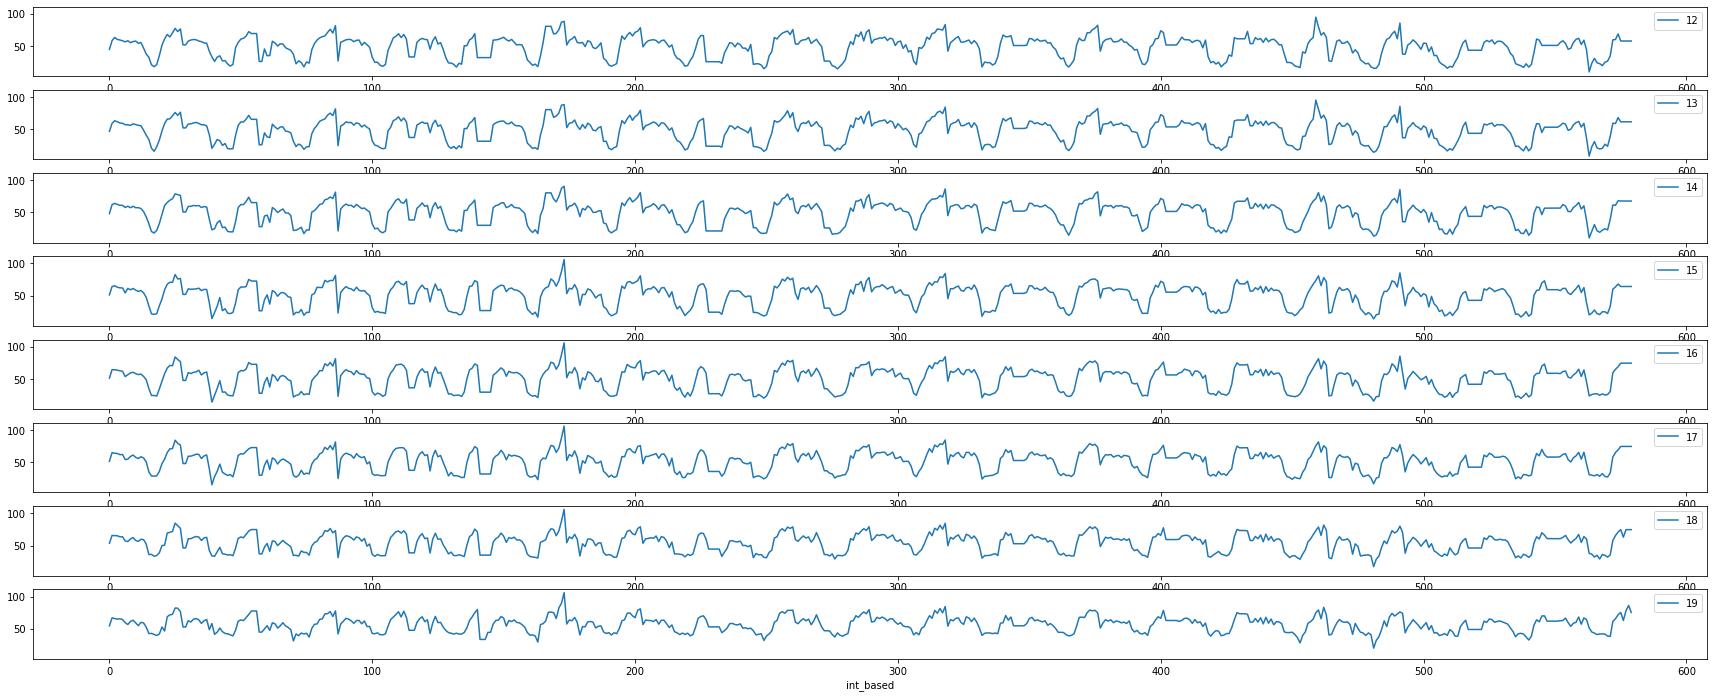

In [17]:
aux_data = aug_data.fillna(method="bfill").fillna(method="ffill")
fig, axes = plt.subplots(nrows=nrows, figsize=(30,12), sharey=True)
for i, ax in enumerate(axes):
    aux_data[[selected_segment_id[i],"int_based"]].plot(x="int_based", y=selected_segment_id[i], ax=ax);

In [18]:
for s_id in selected_segment_id:
    stationary_check = sm.tsa.stattools.adfuller(aux_data[s_id])
    print(f"p value is {stationary_check[1]}, segment_id = {s_id} ")

p value is 3.508347570638025e-14, segment_id = 12 
p value is 1.6847424288762814e-14, segment_id = 13 
p value is 1.3595191310545193e-14, segment_id = 14 
p value is 1.849682839215101e-15, segment_id = 15 
p value is 9.414713261821103e-16, segment_id = 16 
p value is 6.351182966894081e-16, segment_id = 17 
p value is 6.196575118758032e-16, segment_id = 18 
p value is 1.388535298587129e-14, segment_id = 19 


In [19]:
aux_data

segment_id,12,13,14,15,16,17,18,19,int_based
aug_time,,,,,,,,,
2019-12-02 06:00:00,44.722729,46.666964,48.237859,51.416755,51.330338,51.603368,53.714197,54.678254,0
2019-12-02 06:30:00,58.105187,58.985505,62.058362,64.227061,64.514188,64.855935,65.642707,66.973878,1
2019-12-02 07:00:00,63.253963,63.140614,64.053676,65.567092,64.390736,64.074163,65.466255,65.886094,2
2019-12-02 07:30:00,60.094236,61.491297,62.467802,63.207307,63.670687,63.620705,65.192888,65.152104,3
2019-12-02 08:00:00,59.187956,59.622095,61.062848,62.237149,62.982029,61.880300,63.597488,65.541210,4
...,...,...,...,...,...,...,...,...,...
2019-12-27 18:00:00,57.651806,61.433779,67.730603,64.354497,74.569168,74.569172,74.670781,75.407743,575
2019-12-27 18:30:00,57.651806,61.433779,67.730603,64.354497,74.569168,74.569172,62.961706,62.961711,576
2019-12-27 19:00:00,57.651806,61.433779,67.730603,64.354497,74.569168,74.569172,74.659934,77.944207,577


### Discarding weekend days

#### bir gün 91 datapoint

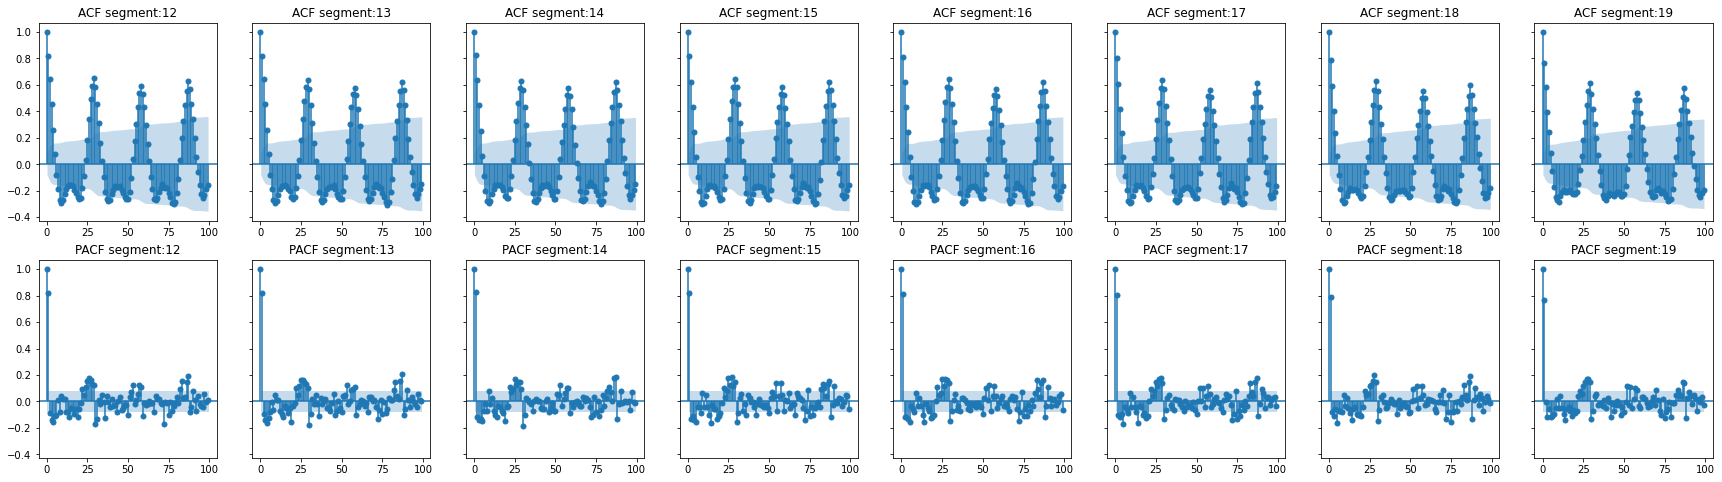

In [20]:
lags=np.arange(0,100,1)
fig, axes = plt.subplots(ncols=len(selected_segment_id), nrows=2, figsize=(30,8), sharey=True)
for i, ax in enumerate(axes[0]):
    sm.graphics.tsa.plot_acf(aux_data[selected_segment_id[i]], lags=lags, ax=axes[0][i], title=f"ACF segment:{selected_segment_id[i]}");
    sm.graphics.tsa.plot_pacf(aux_data[selected_segment_id[i]], lags=lags, ax=axes[1][i], title=f"PACF segment:{selected_segment_id[i]}");

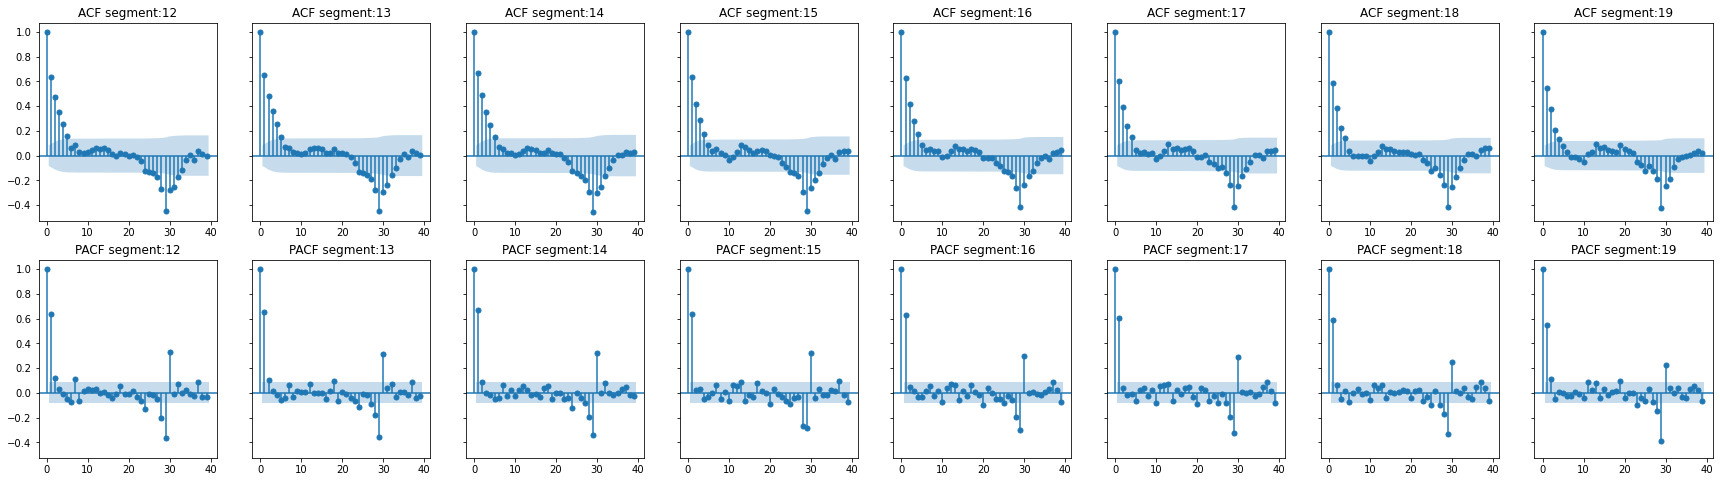

In [21]:
lags=np.arange(0,40,1)
fig, axes = plt.subplots(ncols=len(selected_segment_id), nrows=2, figsize=(30,8), sharey=True)
for i, ax in enumerate(axes[0]):
    sm.graphics.tsa.plot_acf(aux_data[selected_segment_id[i]].diff(29).dropna(), lags=lags, ax=axes[0][i], title=f"ACF segment:{selected_segment_id[i]}");
    sm.graphics.tsa.plot_pacf(aux_data[selected_segment_id[i]].diff(29).dropna(), lags=lags, ax=axes[1][i], title=f"PACF segment:{selected_segment_id[i]}");

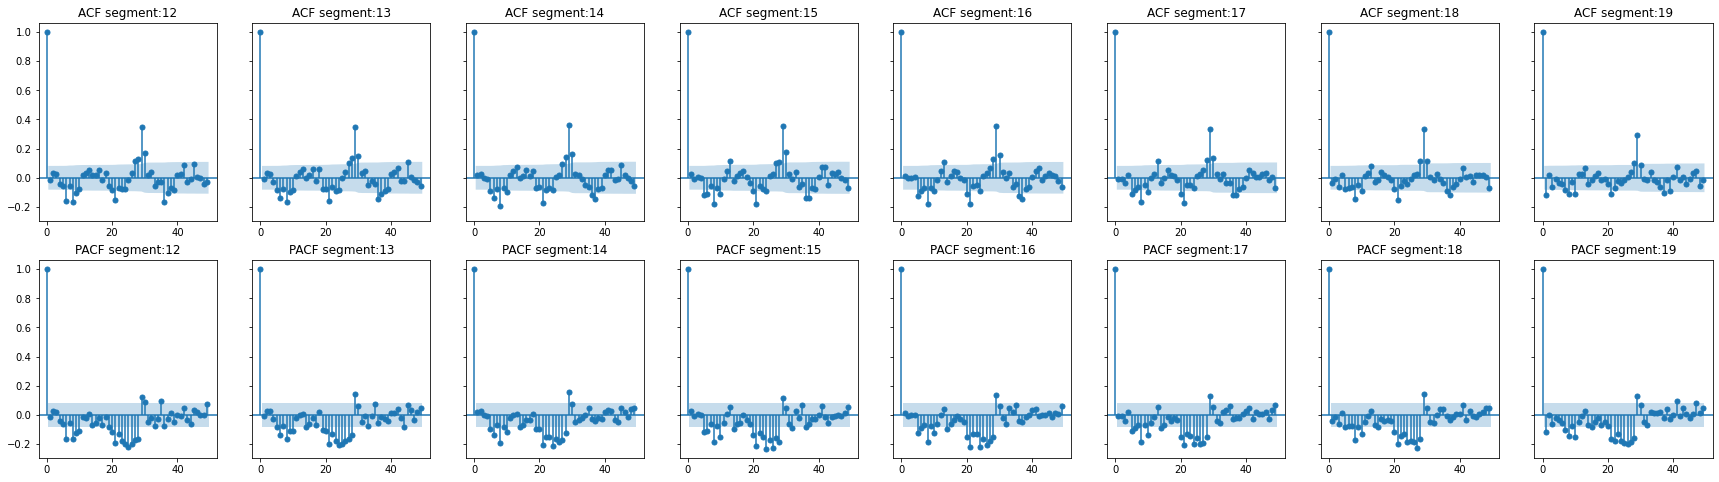

In [22]:
lags=np.arange(0,50,1)
fig, axes = plt.subplots(ncols=len(selected_segment_id), nrows=2, figsize=(30,8), sharey=True)
for i, ax in enumerate(axes[0]):
    sm.graphics.tsa.plot_acf(aux_data[selected_segment_id[i]].diff().dropna(), lags=lags, ax=axes[0][i], title=f"ACF segment:{selected_segment_id[i]}");
    sm.graphics.tsa.plot_pacf(aux_data[selected_segment_id[i]].diff().dropna(), lags=lags, ax=axes[1][i], title=f"PACF segment:{selected_segment_id[i]}");

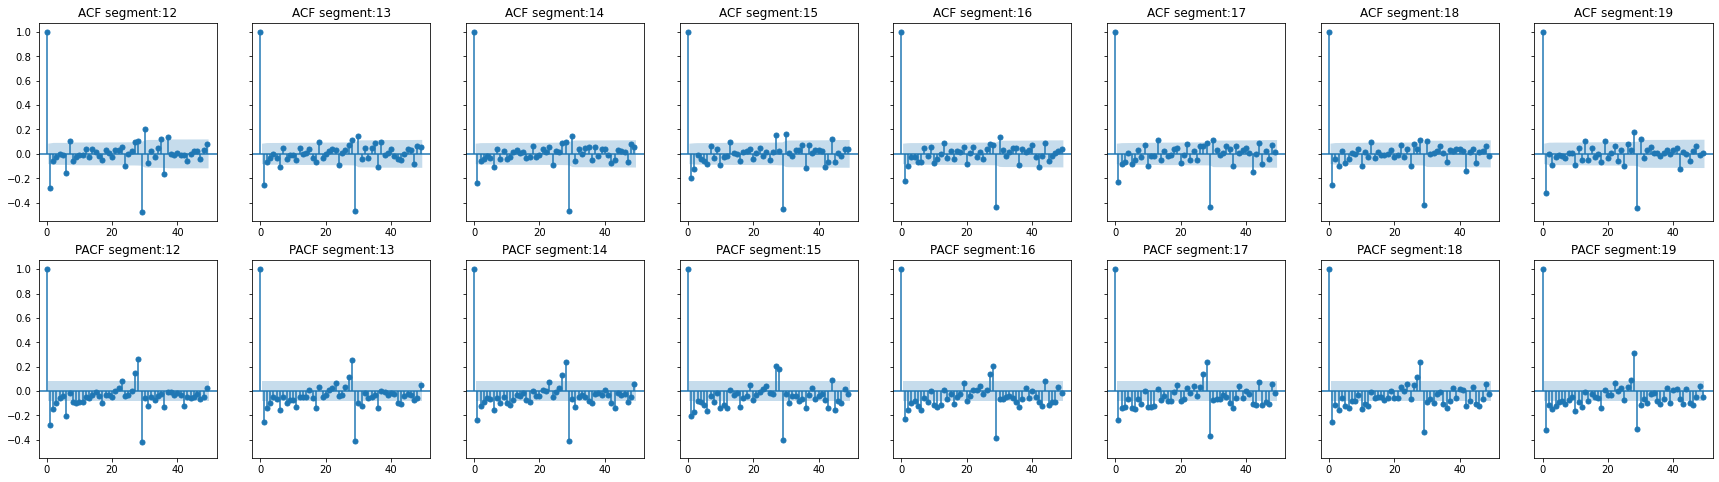

In [23]:
lags=np.arange(0,50,1)
fig, axes = plt.subplots(ncols=len(selected_segment_id), nrows=2, figsize=(30,8), sharey=True)
for i, ax in enumerate(axes[0]):
    sm.graphics.tsa.plot_acf(aux_data[selected_segment_id[i]].diff().diff(29).dropna(), lags=lags, ax=axes[0][i], title=f"ACF segment:{selected_segment_id[i]}");
    sm.graphics.tsa.plot_pacf(aux_data[selected_segment_id[i]].diff().diff(29).dropna(), lags=lags, ax=axes[1][i], title=f"PACF segment:{selected_segment_id[i]}");

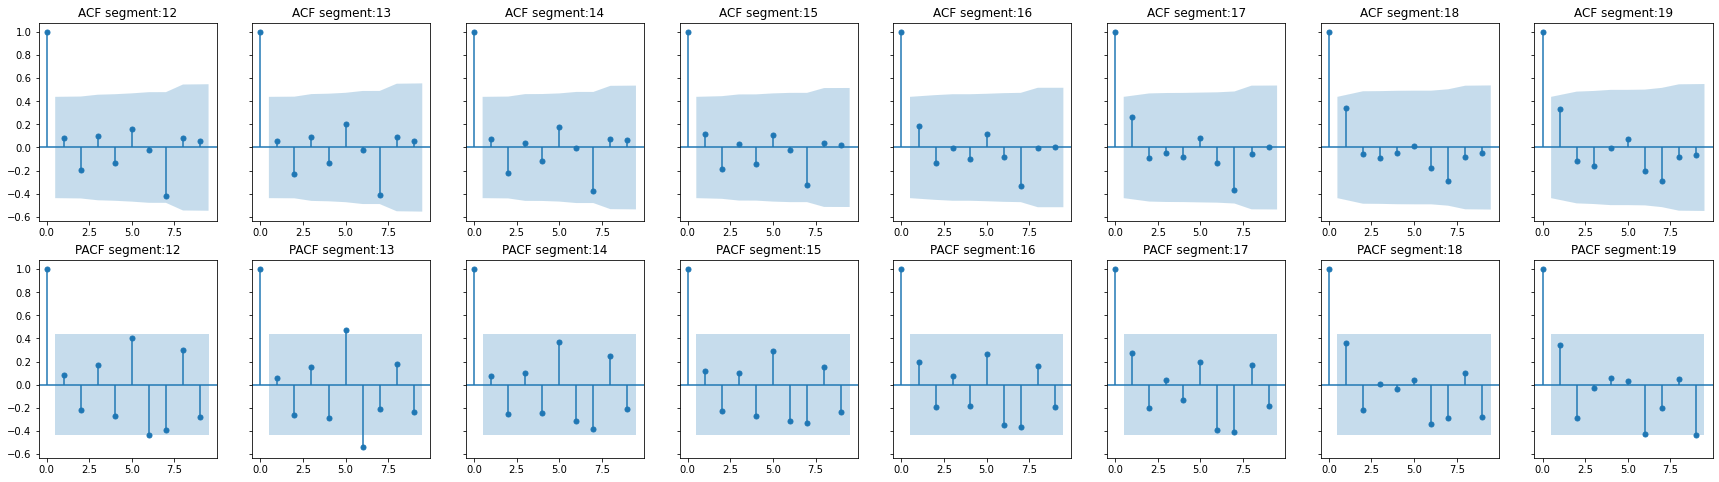

In [24]:
lags=np.arange(0,len(aux_data.iloc[::29,0])/2,1)
fig, axes = plt.subplots(ncols=len(selected_segment_id), nrows=2, figsize=(30,8), sharey=True)
for i, ax in enumerate(axes[0]):
    sm.graphics.tsa.plot_acf(aux_data.iloc[::29,i], lags=lags, ax=axes[0][i],title=f"ACF segment:{selected_segment_id[i]}");
    sm.graphics.tsa.plot_pacf(aux_data.iloc[::29,i], lags=lags, ax=axes[1][i],title=f"PACF segment:{selected_segment_id[i]}");


In [25]:
def try_arima_coef(series, seasonal_lag):
    model_results = []

    try:
        p, d,q = 2, 0, 0
        sp, sd, sq = 1, 0, 1
#         p, d,q = 3, 0, 2
#         sp, sd, sq = 1, 0, 1
        model = sm.tsa.statespace.SARIMAX(series, order=(p, d, q), seasonal_order=(sp,sd,sq,seasonal_lag), trend="c")
        results = model.fit(maxiter=100)
        model_results.append((p, d, q, results, model))
    except:
        model_results.append(None)

    # # Loop over p values from 0-2
    # # for seasonal_lag in np.arange(91,93):
    # for p in range(3):
    #     # Loop over q values from 0-2
    #     for d in range(2):
    #         for q in range(3):
    #
    #             try:
    #                 # create and fit ARMA(p,q) model
    #                 model = sm.tsa.statespace.SARIMAX(series, order=(p, d, q), seasonal_order=(p,d,q,400))
    #                 results = model.fit()
    #
    #                 # Print order and results
    #                 # print(p, q, results.aic, results.bic)
    #                 model_results.append((p, d, q, results.aic, results.bic))
    #             except:
    #                 # print
    #                 model_results.append((p, d, q, None, None))
    return model_results

In [26]:
names = ([f"segment_{i}" for i in selected_segment_id])
names.append("int_based")
aux_data.columns = names

aux_data = aux_data.reset_index()
aux_data

,aug_time,segment_12,segment_13,segment_14,segment_15,segment_16,segment_17,segment_18,segment_19,int_based
0,2019-12-02 06:00:00,44.722729,46.666964,48.237859,51.416755,51.330338,51.603368,53.714197,54.678254,0
1,2019-12-02 06:30:00,58.105187,58.985505,62.058362,64.227061,64.514188,64.855935,65.642707,66.973878,1
2,2019-12-02 07:00:00,63.253963,63.140614,64.053676,65.567092,64.390736,64.074163,65.466255,65.886094,2
3,2019-12-02 07:30:00,60.094236,61.491297,62.467802,63.207307,63.670687,63.620705,65.192888,65.152104,3
4,2019-12-02 08:00:00,59.187956,59.622095,61.062848,62.237149,62.982029,61.880300,63.597488,65.541210,4
...,...,...,...,...,...,...,...,...,...,...
575,2019-12-27 18:00:00,57.651806,61.433779,67.730603,64.354497,74.569168,74.569172,74.670781,75.407743,575
576,2019-12-27 18:30:00,57.651806,61.433779,67.730603,64.354497,74.569168,74.569172,62.961706,62.961711,576
577,2019-12-27 19:00:00,57.651806,61.433779,67.730603,64.354497,74.569168,74.569172,74.659934,77.944207,577
578,2019-12-27 19:30:00,57.651806,61.433779,67.730603,64.354497,74.569168,74.569172,74.659934,86.240871,578


## do not forget to set seasonal_lag in accordanve with time bin

In [27]:
seasonal_lag = 29
result = try_arima_coef(aux_data.loc[aux_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_12"] ,seasonal_lag)

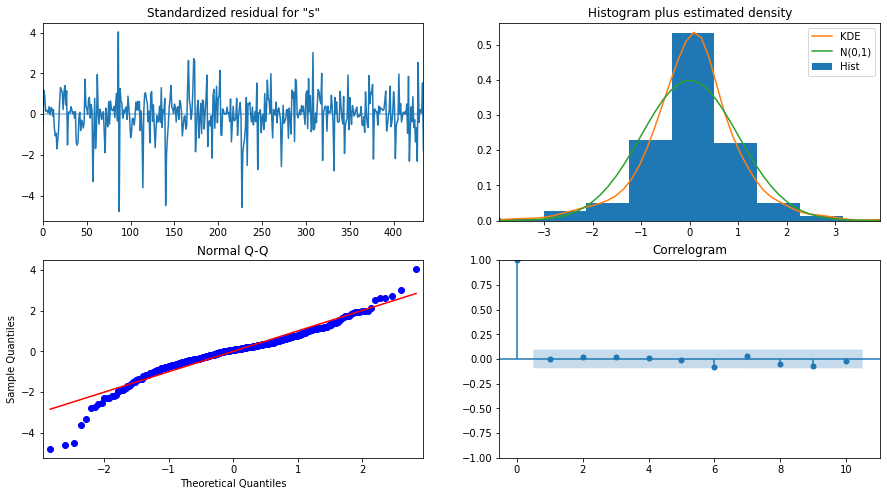

In [28]:
arima_results = result[0][3]
model = result[0][4]
arima_results.mle_retvals
arima_results.plot_diagnostics(figsize=(15,8));

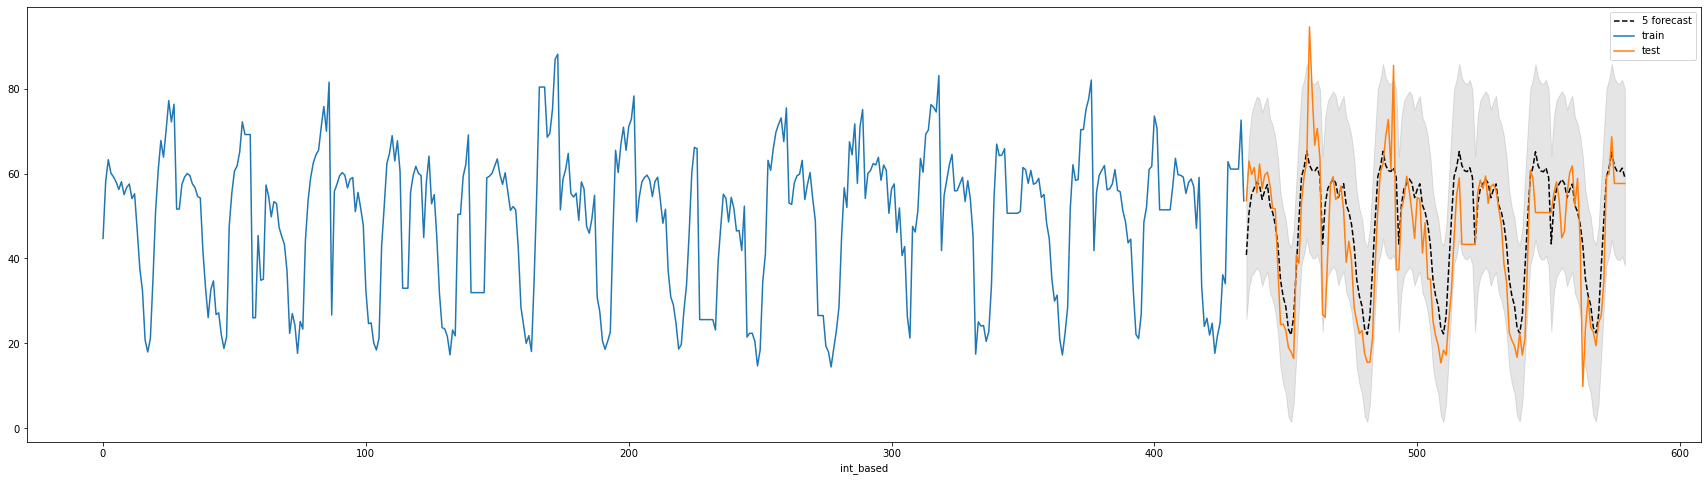

In [46]:
fcast_all = arima_results.get_forecast(seasonal_lag * 5).summary_frame(alpha=0.05)

fig, ax = plt.subplots(figsize=(30, 8))

fcast_all['mean'].plot(ax=ax, style='k--', label="5 forecast", legend=True)

aux_data.iloc[:-seasonal_lag * 5].plot(kind="line", x="int_based", y="segment_12", ax=ax, label="train", legend=True);
aux_data.iloc[-seasonal_lag * 5:].plot(kind="line", x="int_based", y="segment_12", ax=ax, label="test",legend=True);
ax.fill_between(fcast_all.index, fcast_all['mean_ci_lower'], fcast_all['mean_ci_upper'], color='k', alpha=0.1);

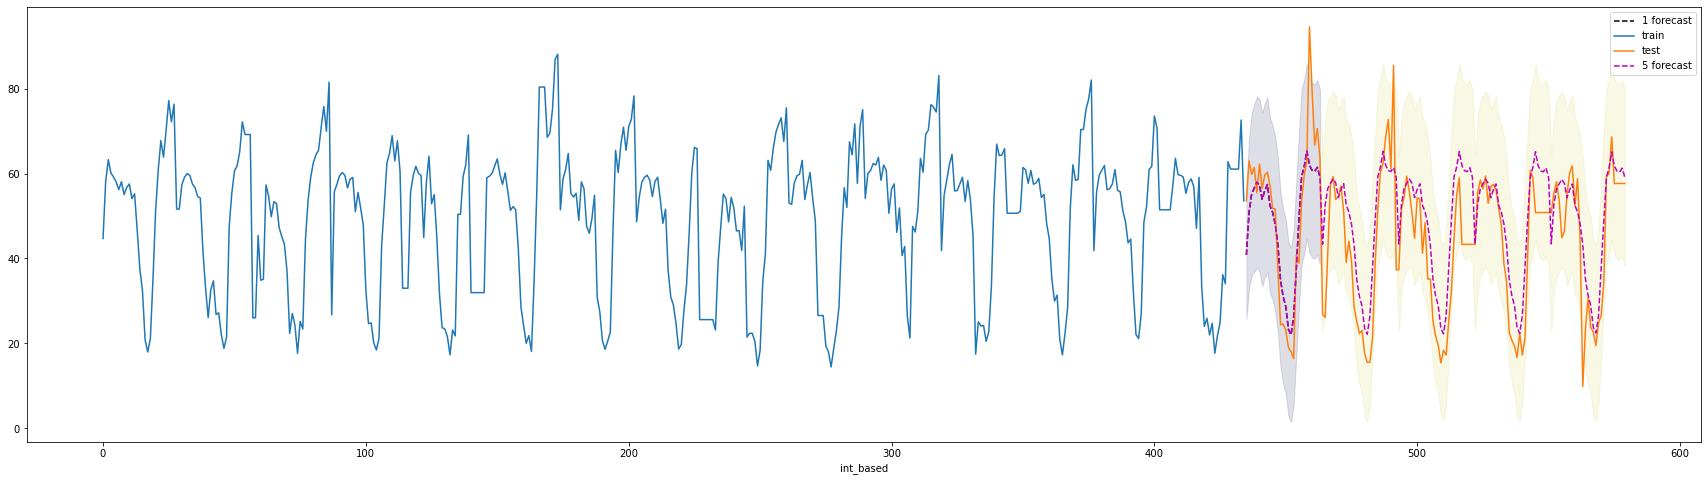

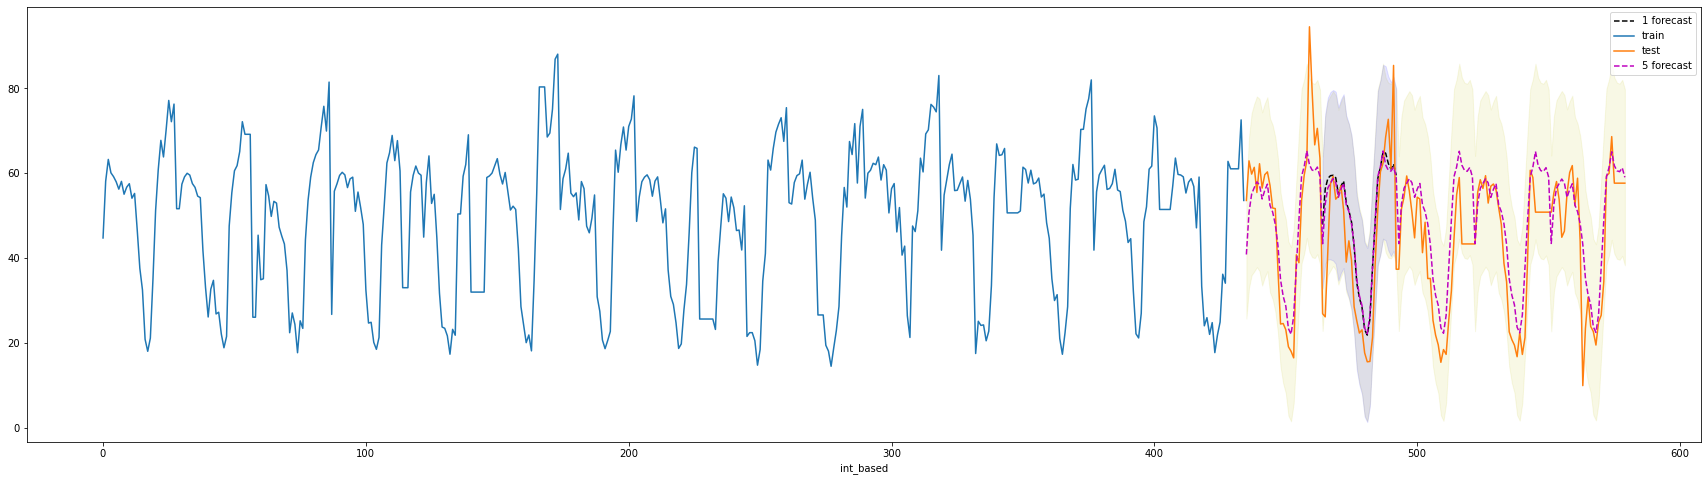

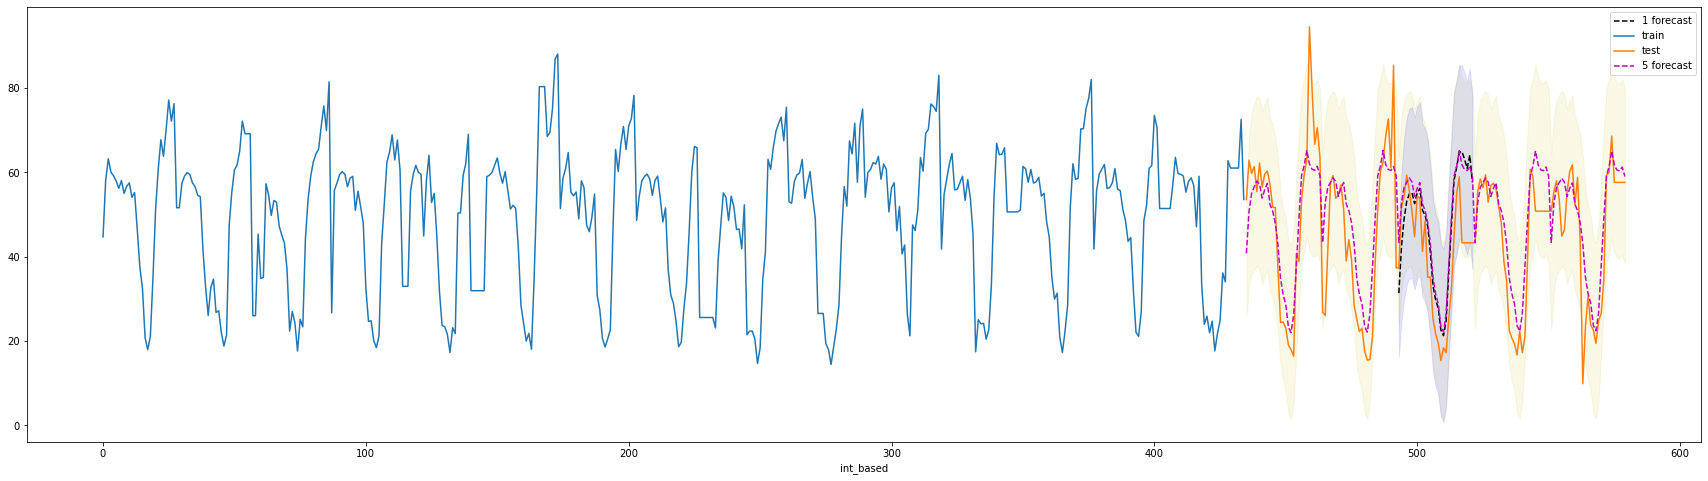

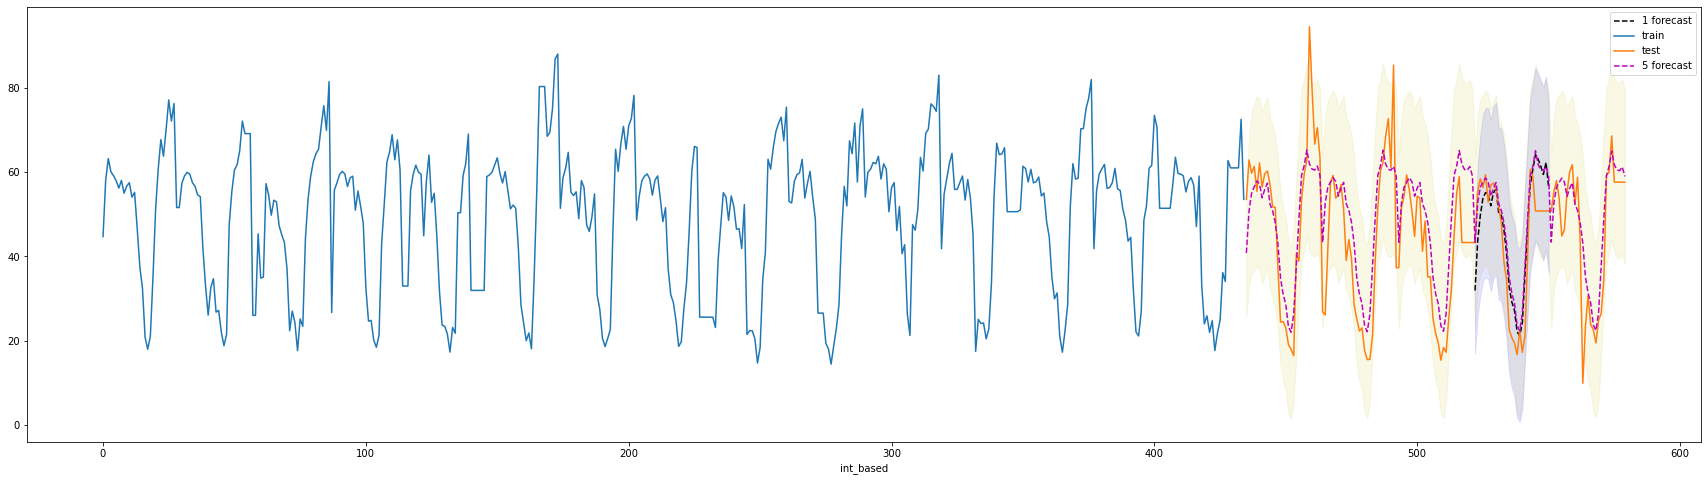

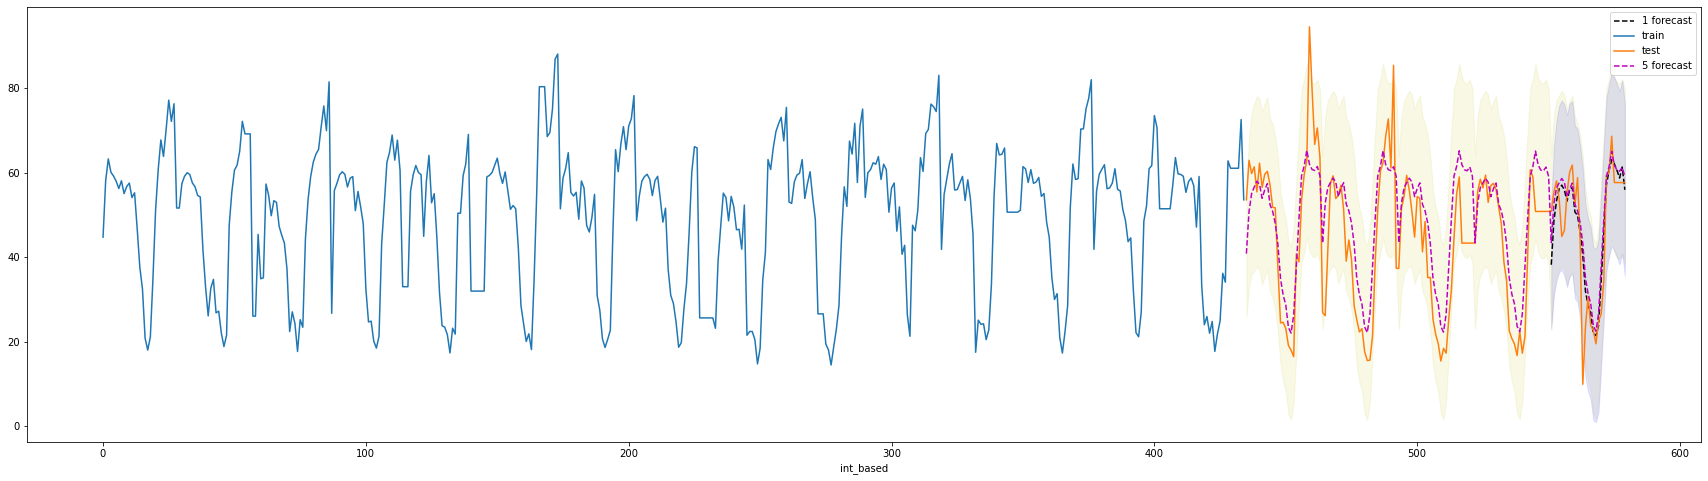

In [61]:
fcast = arima_results.get_forecast(seasonal_lag * 1).summary_frame(alpha=0.05)

# plot
fig, ax = plt.subplots(figsize=(30, 8))

fcast['mean'].plot(ax=ax, style='k--', label="1 forecast", legend=True)
aux_data.iloc[:-seasonal_lag * 5].plot(kind="line", x="int_based", y="segment_12", ax=ax, label="train", legend=True);
aux_data.iloc[-seasonal_lag * 5:].plot(kind="line", x="int_based", y="segment_12", ax=ax, label="test",legend=True);
fcast_all['mean'].plot(ax=ax, style='m--', label="5 forecast", legend=True)
ax.fill_between(fcast_all.index, fcast_all['mean_ci_lower'], fcast_all['mean_ci_upper'], color='y', alpha=0.1);
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='b', alpha=0.1);

# copy
dyn_arima_results = arima_results

for i in range(1,5):
    # append true data to arima model
    dyn_arima_results = dyn_arima_results.append(aux_data.loc[(aux_data["aug_time"].dt.isocalendar()["week"] == 52) & (aux_data["aug_time"].dt.isocalendar()["day"] == i), "segment_12"])
    # make 1 day forecast
    fcast = dyn_arima_results.get_forecast(seasonal_lag * 1).summary_frame(alpha=0.05)
    
    # plot
    fig, ax = plt.subplots(figsize=(30, 8))
    
    fcast['mean'].plot(ax=ax, style='k--', label="1 forecast", legend=True)
    aux_data.iloc[:-seasonal_lag * 5].plot(kind="line", x="int_based", y="segment_12", ax=ax, label="train", legend=True);
    aux_data.iloc[-seasonal_lag * 5:].plot(kind="line", x="int_based", y="segment_12", ax=ax, label="test",legend=True);
    fcast_all['mean'].plot(ax=ax, style='m--', label="5 forecast", legend=True)
    ax.fill_between(fcast_all.index, fcast_all['mean_ci_lower'], fcast_all['mean_ci_upper'], color='y', alpha=0.1);
    ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='b', alpha=0.1);
    
dyn_arima_results = dyn_arima_results.append(aux_data.loc[(aux_data["aug_time"].dt.isocalendar()["week"] == 52) & (aux_data["aug_time"].dt.isocalendar()["day"] == i+1), "segment_12"])

In [78]:
prediction = dyn_arima_results.fittedvalues.iloc[-seasonal_lag * 5:]
true = aux_data.iloc[-seasonal_lag * 5:, aux_data.columns.get_indexer(["segment_12"])].squeeze()

In [99]:
((true - prediction)/true).abs().mean()

0.15306278744624616

In [100]:
np.sqrt((((true - prediction) ** 2).mean()))

7.878913458909573

In [49]:
# fig, ax = plt.subplots(figsize=(30, 8))
# dyn_arima_results.fittedvalues.iloc[-seasonal_lag * 5:].plot(ax=ax, style='k--', label="dynamic forecast day-by-day", legend=True)
# aux_data.iloc[:-seasonal_lag * 5].plot(kind="line", x="int_based", y="segment_12", ax=ax, label="train", legend=True);
# aux_data.iloc[-seasonal_lag * 5:].plot(kind="line", x="int_based", y="segment_12", ax=ax, label="test",legend=True);


    

In [51]:
# dyn_arima_results.model.data.orig_endog